# YOLO 설치

In [2]:
!pip install ultralytics

2025-08-06

# 예측

## matplotlib 출력


image 1/1 C:\Users\ai\Desktop\object_detection\vscode_dev\object_detection\imgs\apple1.png: 640x448 23 apples, 1 orange, 255.5ms
Speed: 7.6ms preprocess, 255.5ms inference, 30.2ms postprocess per image at shape (1, 3, 640, 448)


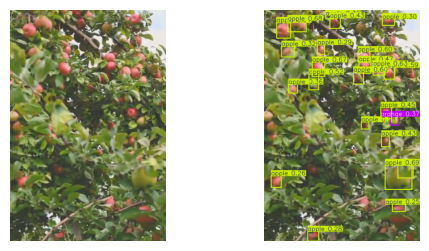

In [6]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

model = YOLO('yolov8n.pt')
results = model.predict('C:\\Users\\ai\\Desktop\\object_detection\\vscode_dev\\object_detection\\imgs\\apple1.png')

for result in results:
    plt.figure(figsize=(6, 3))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(result.orig_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(result.plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.show()

## cv2로 출력

In [ ]:
# # Intel OpenMP 런타임 라이브러리(libiomp5md.dll)가 이미 초기화된 상태에서 다시 초기화하려 할 때 발생하는 오류 해결
# import os
# os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

#--------------------------------------------

from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

model = YOLO('yolov8n.pt')
# results = model.predict('C:\\Users\\ai\\Desktop\\object_detection\\vscode_dev\\object_detection\\imgs\\apple1.png')
results = model.predict([
    'C:\\Users\\ai\\Desktop\\object_detection\\vscode_dev\\object_detection\\imgs\\image1.jpg',
    'C:\\Users\\ai\\Desktop\\object_detection\\vscode_dev\\object_detection\\imgs\\image2.jpg',
    'C:\\Users\\ai\\Desktop\\object_detection\\vscode_dev\\object_detection\\imgs\\image3.jpg',
    ])

for result in results:
    cv2.imshow('Org', result.orig_img)
    cv2.imshow('Res', result.plot())
    
    if cv2.waitKey(1000) &0xFF == ord('q'):
        break
    
cv2.destroyAllWindows()


0: 640x640 1 person, 3 cars, 1 skateboard, 55.2ms
1: 640x640 1 person, 1 car, 55.2ms
2: 640x640 1 banana, 1 apple, 55.2ms
Speed: 2.3ms preprocess, 55.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


# 훈련

In [12]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="./datasets/data.yaml",
    epochs=10,
    imgsz=640,
    batch=16,
    )

Ultralytics 8.3.174  Python-3.11.13 torch-2.5.1 CPU (12th Gen Intel Core(TM) i7-1260P)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./datasets/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 22        [15, 18, 21]  1    751507  ultralytics.nn.modules.head.Detect           [1, [64, 128, 256]]           
Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access  (ping: 0.10.0 ms, read: 3.40.7 MB/s, size: 43.6 KB)


train: Scanning C:\Users\ai\Desktop\object_detection\vscode_dev\object_detection\datasets\train\labels... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 227.92it/s]

train: New cache created: C:\Users\ai\Desktop\object_detection\vscode_dev\object_detection\datasets\train\labels.cache
val: Fast image access  (ping: 0.10.0 ms, read: 4.00.5 MB/s, size: 50.1 KB)



val: Scanning C:\Users\ai\Desktop\object_detection\vscode_dev\object_detection\datasets\valid\labels... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<00:00, 97.67it/s]

val: New cache created: C:\Users\ai\Desktop\object_detection\vscode_dev\object_detection\datasets\valid\labels.cache


Plotting labels to C:\runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to C:\runs\detect\train
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.962      3.474      1.714        286        640: 100%|██████████| 1/1 [00:02<00:00,  2.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all          6        190     0.0361      0.342     0.0265     0.0119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      2.084       3.55      1.742        282        640: 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all          6        190     0.0383      0.363     0.0299     0.0131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G       2.02      3.463      1.731        251        640: 100%|██████████| 1/1 [00:01<00:00,  2.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all          6        190     0.0411      0.389     0.0346     0.0148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      2.016      3.445      1.667        253        640: 100%|██████████| 1/1 [00:01<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all          6        190     0.0456      0.432     0.0388     0.0174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.892      3.377      1.597        260        640: 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all          6        190     0.0494      0.468     0.0421     0.0205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.986      3.287      1.753        260        640: 100%|██████████| 1/1 [00:01<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all          6        190     0.0517      0.489     0.0473     0.0233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.935      3.242      1.729        235        640: 100%|██████████| 1/1 [00:01<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all          6        190     0.0567      0.537      0.052      0.026



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.912      3.217       1.52        293        640: 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all          6        190       0.06      0.568      0.057     0.0278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.916      3.162      1.501        284        640: 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all          6        190     0.0628      0.595     0.0633     0.0303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.937      3.046      1.655        218        640: 100%|██████████| 1/1 [00:01<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all          6        190     0.0639      0.605     0.0675     0.0326



10 epochs completed in 0.008 hours.
Optimizer stripped from C:\runs\detect\train\weights\last.pt, 6.2MB
Optimizer stripped from C:\runs\detect\train\weights\best.pt, 6.2MB

Validating C:\runs\detect\train\weights\best.pt...
Ultralytics 8.3.174  Python-3.11.13 torch-2.5.1 CPU (12th Gen Intel Core(TM) i7-1260P)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]


                   all          6        190     0.0639      0.605     0.0674     0.0321
Speed: 1.1ms preprocess, 66.6ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to C:\runs\detect\train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001DD174E42D0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [ ]:
# # Intel OpenMP 런타임 라이브러리(libiomp5md.dll)가 이미 초기화된 상태에서 다시 초기화하려 할 때 발생하는 오류 해결
# import os
# os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

#--------------------------------------------

from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

model = YOLO('yolov8n.pt')
# results = model.predict('C:\\Users\\ai\\Desktop\\object_detection\\vscode_dev\\object_detection\\imgs\\apple1.png')
results = model.predict([
    'C:\\Users\\ai\\Desktop\\object_detection\\vscode_dev\\object_detection\\imgs\\image1.jpg',
    'C:\\Users\\ai\\Desktop\\object_detection\\vscode_dev\\object_detection\\imgs\\image2.jpg',
    'C:\\Users\\ai\\Desktop\\object_detection\\vscode_dev\\object_detection\\imgs\\image3.jpg',
    ])

for result in results:
    cv2.imshow('Org', result.orig_img)
    cv2.imshow('Res', result.plot())
    
    if cv2.waitKey(1000) &0xFF == ord('q'):
        break
    
cv2.destroyAllWindows()

# 테스트

In [16]:

# Intel OpenMP 런타임 라이브러리(libiomp5md.dll)가 이미 초기화된 상태에서 다시 초기화하려 할 때 발생하는 오류 해결
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2


model = YOLO('runs\\detect\\train\\weights\\best.pt')



results = model.predict([
    'C://Users//ai//Desktop//object_detection//vscode_dev//object_detection//datasets//a.jpg', 
    'C://Users//ai//Desktop//object_detection//vscode_dev//object_detection//datasets//b.jpg'
    ])

for result in results:
    cv2.imshow('Org', result.orig_img)
    cv2.imshow('Res', result.plot())
    
    if cv2.waitKey(1000) &0xFF == ord('q'):
        break

FileNotFoundError: [Errno 2] No such file or directory: 'runs\\detect\\train\\weights\\best.pt'

# 동영상

In [20]:
from ultralytics import YOLO
import cv2

model = YOLO('yolov8n.pt')
cap = cv2.VideoCapture(r'C:\Users\ai\Desktop\object_detection\vscode_dev\object_detection\imgs\apple1.mp4')
fps = cap.get(cv2.CAP_PROP_FPS)
delay = int(1000/fps) if fps>0 else 1   # fps가 0일 경우 에러 방지용

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    results = model.predict(frame, verbose=False)
    out = results[0].plot()
    cv2.imshow('res', out)
 
    # key 입력을 delay(ms)만큼만 대기 → 영상을 실시간 재생
    if cv2.waitKey(delay) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()
